# Programming for Data Analysis Assignment

In [1]:
import numpy as np
rng = np.random.default_rng()
rng.integers(10,25)

22

In [2]:
rng = np.random.default_rng()
rng.integers(100, size=10)

array([79, 87, 65, 11, 90, 90, 69, 72, 42, 74], dtype=int64)

In [3]:
rng = np.random.default_rng()
rng.integers(50,100, size=10)

array([85, 65, 87, 66, 81, 81, 57, 94, 79, 96], dtype=int64)

In [4]:
rng = np.random.default_rng()
rng.integers(100, size=(2,4))

array([[60, 49, 62, 98],
       [61, 84, 77, 35]], dtype=int64)

In [5]:
rng = np.random.default_rng()
rng.random()

0.8285502043462522

In [6]:
rng = np.random.default_rng()
rng.random(5)

array([0.44936023, 0.04617363, 0.08055846, 0.48013992, 0.79254455])

In [7]:
rng = np.random.default_rng()
rng.random((5,4))

array([[0.10621081, 0.72638537, 0.37770792, 0.88378614],
       [0.59835855, 0.6213912 , 0.12500595, 0.0943549 ],
       [0.32851797, 0.26991264, 0.99883319, 0.57681654],
       [0.64516304, 0.72869343, 0.79335484, 0.85756357],
       [0.53958818, 0.19103586, 0.87823545, 0.04782101]])

In [8]:
rng = np.random.default_rng()
x = rng.random(1000000)

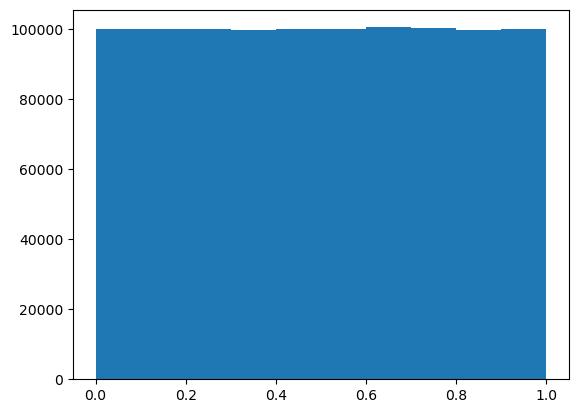

In [9]:
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

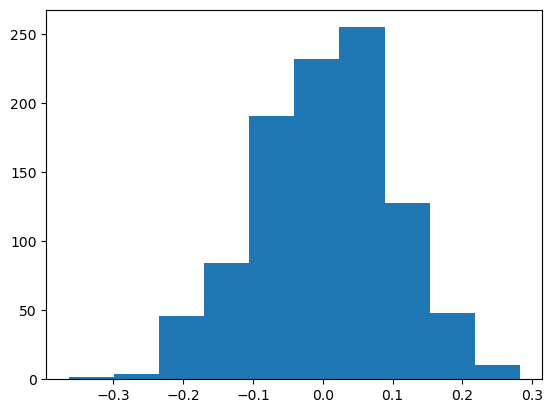

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 1000)
plt.hist(s)
plt.show()

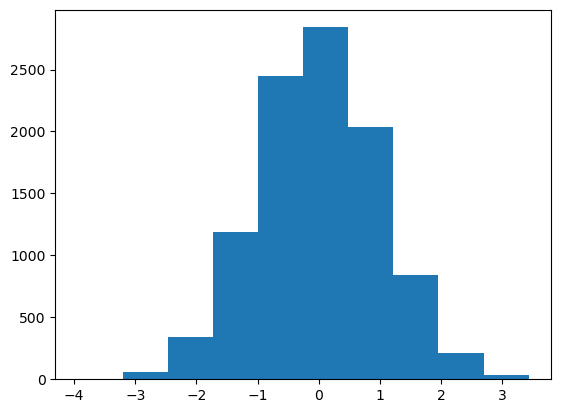

In [11]:
y = np.random.normal(0.0,1.0,10000)
plt.hist(y)
plt.show()

In [12]:
rng = np.random.default_rng(seed=43)
x = rng.random()
print(x)

0.6522992627009107


In [13]:
rng = np.random.default_rng(seed=44)
x = rng.integers(10)
print(x)

6


In [14]:
rng = np.random.default_rng(seed=43)
x = rng.random((2,4))
print(x)

[[0.65229926 0.04377532 0.02002959 0.83921258]
 [0.58714305 0.22470523 0.75179227 0.2636922 ]]


In [15]:
rng = np.random.default_rng(seed=43)
x = rng.integers(50,100,size=(3,3))
print(x)

[[75 82 70]
 [52 78 51]
 [63 91 73]]
